In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix, lambdify, sin, cos
from sympy.solvers.solveset import linsolve
from sympy.physics.mechanics import dynamicsymbols, init_vprinting
from scipy.integrate import solve_ivp

init_vprinting()

In [18]:
q1, q2 = dynamicsymbols('q_1 q_2')
params = [q1, q1.diff(), q2, q2.diff()]
initial_conditions = [np.pi/18, 0, np.pi/6, 0]
time_interval = [0, 15]
# l1, l2, m1, m2, g = 1, 1, 1, 1, 9.81
l, m, g = 1, 1, 9.81
q1f, q2f = np.pi/6, np.pi/3
b01, g01, b12, g12 = 450, 300, 200, 300
IC1, IC2 = m*l**2/12, m*l**2/12

In [19]:
T01 = Matrix([0,0,-b01*q1.diff() - g01*(q1-q1f) + 0.5*g*l*m*cos(q1) + g*l*m*cos(q1)])
T12 = Matrix([0,0,-b12*q2.diff() - g12*(q2-q2f) + 0.5*g*l*m*cos(q2)])

In [20]:
omg1, omg2 = Matrix([0,0,q1.diff()]), Matrix([0,0,q2.diff()])
alp1, alp2 = omg1.diff(), omg2.diff()
G1, G2 = Matrix([0,-m*g,0]), Matrix([0,-m*g,0])

rC1 = l/2 * Matrix([cos(q1), sin(q1), 0])
rC2 = 2*rC1 + l/2 * Matrix([cos(q2), sin(q2), 0])
vC1, vC2 = rC1.diff(), rC2.diff()
aC1, aC2 = vC1.diff(), vC2.diff()

In [21]:
F12 = m*aC2 - G2
rBC2 = 2*rC1 - rC2
eq2 = - IC2 * alp2 + rBC2.cross(F12) + T12
F01 = m*aC1 - (-F12) - G1
eq1 = - IC1 * alp1 + (-rC1).cross(F01) + rC1.cross(-F12) + (-T12) + T01

In [22]:
sol = list(linsolve((eq1[2], eq2[2]), (alp1[2], alp2[2])))[0]

In [23]:
dq1 = lambdify(params, q1.diff())
ddq1 = lambdify(params, sol[0])
dq2 = lambdify(params, q2.diff())
ddq2 = lambdify(params, sol[1])
fun = lambda t, y: [dq1(*y), ddq1(*y), dq2(*y), ddq2(*y)]
res = solve_ivp(fun, time_interval, initial_conditions,
               t_eval=np.linspace(*time_interval, 10000))

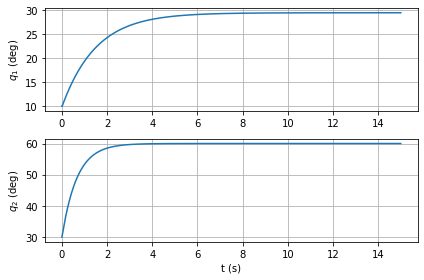

In [15]:
fig, ax = plt.subplots(nrows=2)
ax[0].plot(res.t, res.y[0]*180/np.pi)
ax[1].plot(res.t, res.y[2]*180/np.pi)
ax[0].grid()
ax[1].grid()
ax[0].set_ylabel(r'$q_1$ (deg)')
ax[1].set_ylabel(r'$q_2$ (deg)')
ax[1].set_xlabel(r't (s)')
plt.tight_layout()
plt.savefig('q1_q2_force.png', dpi=600)

In [72]:
T01_np = lambdify(params, T01[2])
T12_np = lambdify(params, T12[2])
T01_np(*res.y)

array([119.21120121, 170.46659383, 135.58416236, ...,  15.25613243,
        15.25554349,  15.25575832])

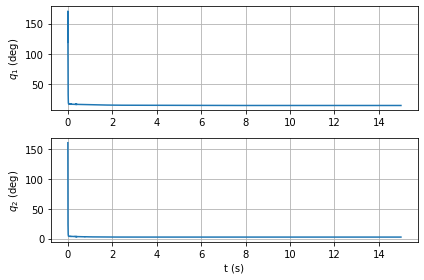

In [68]:
fig, ax = plt.subplots(nrows=2)
ax[0].plot(res.t, T01_np(*res.y))
ax[1].plot(res.t, T12_np(*res.y))
ax[0].grid()
ax[1].grid()
ax[0].set_ylabel(r'$q_1$ (deg)')
ax[1].set_ylabel(r'$q_2$ (deg)')
ax[1].set_xlabel(r't (s)')
plt.tight_layout()
plt.savefig('T01_T12.png', dpi=600)